Conversão de modelos de representação de imagens coloridas
===
---

1. Pesquise na documentação da OpenCV os recursos existentes para trabalhar com diferentes modelos de cor disponíveis. Faça um breve resumo de cada um dos modelos. Demonstre a aplicação dos recursos realizando a transformação da imagem peppers.png para os diferentes modelos e realizando a exibição de cada um dos planos de representação, comentando aas diferenças entre os vários modelos.

2. Corrija a distribuição de intensidades luminosas na imagem do arquivo forest.jpg de modo que seja possível visualizar melhor a parte escura da imagem.  

Questão 1: Modelos de cor
=====

Na biblioteca **OpenCV** existem diversos modelos de cor para serem trabalhados. Vejamos algumas delas:

In [4]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

Apesar de diversas, nesse estudo iremos abordar os modelos mais utilizados: **RGB**, **HSV** e **L\*a\*b\***.

RGB
===
O modelo de RGB se baseia na absorção do olho humano à luz e as cores são vistas como combinações das chamadas cores primárias: ***Red* (Vermelho)**, ***Green* (Verde)** e ***Blue* (Azul)**. 

O subespaço de cores de interesse é um cubo, de modo que:
- Os valores RGB primário estão em três vértices.
- As cores secundárias ciano, magenta e amarelo estão em outros três vértices.
- O preto está na origem e o branco está no vértice mais distante.

<p align="center">
    <img src="rgb.png" width="500">
</p>

O principal objetivo do modelo de cores RGB é para a detecção, representação e exibição de imagens em sistemas eletrônicos, como televisores e computadores.

HSV
===
O modelo RGB não é adequado para descrever cores na prática para a interpretação humana. O que mais é o modelo **HSV**: ***Hue* (Matiz)**, ***Saturation* (Saturação)** e ***Value* (Valor)**. O HSV também é conhecido como **HSB** (*hue*, *saturation* e *brightness* — matiz, saturação e brilho, respectivamente). Esse modelo utiliza desses três parâmetros:

- **Matiz:** É um atributo que descreve uma cor pura.
- **Saturação:** diz uma medida em grau de diluição de uma cor pura por luz branca.
- **Valor:** caracteriza o brilho da cor.

<p align="center">
    <img src="hsv.jpeg" width="500">
</p>

Outros sistemas de cores relacionados incluem o HSL (L de luminosity ou luminosidade) e o HSI (I de intensity ou intensidade).

> **Observação:** A biblioteca do OpenCV não trabalha com o modelo HSI.

L\*a\*b\*
===

O modelo L\*a\*b\* também consiste nas percepções humanas com base na teoria de cores opostas, onde duas cores não podem ser verdes e vermelhas ao mesmo tempo, ou amarelas e azuis ao mesmo tempo. A consequência desse sistema é que as cores são bem definidas e sem nenhuma ambiguidade. Seus canais são:

- L*: Luminosidade
- a*: coordenada vermelho/verde (+a indica vermleho e–a indica verde)
- b*: coordenada amarelo/azul (+b indica amarelo e –b indica azul)

<p align="center">
    <img src="lab.png" width="500">
</p>

A biblioteca do OpenCV permite que você faça transformações de um modelo para o outro utilizando a função `cv2.cvtColor`.

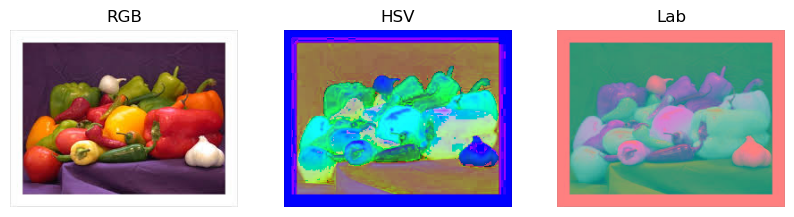

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('pimenta.jpg')
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

list = [rgb, hsv, lab]
title = ['RGB', 'HSV', 'Lab']
plt.figure(figsize=(10,7))

for i in range(len(list)):
    plt.subplot(131 + i), plt.imshow(list[i], 'gray'), plt.title(str(title[i])), plt.axis('off')

O matplotlib exibe os resultado em RGB, por isso as cores das imagens estão alterados. Entretanto, é possível visualizar a mudança dos valores nos canais que estão coerentes a cada modelo transformado.

Questão 2: Distribuição de Intensidade Luminosa
=====

Assim como já visto no estudo anterior, o modelo que aborda em específico a intensidade luminosa é o HSV. Portanto, para sua correção, foi feito a equalização do histograma do canal *value* da imagem.

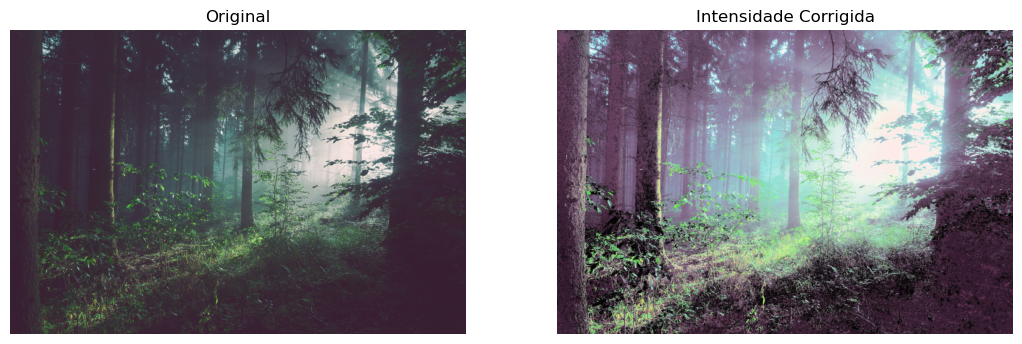

In [36]:
import numpy as np
import cv2 as cv

# carregando a imagem
scr = cv.imread('forest.jpg')

# transformando a imagem em HSV
img_hsv = cv.cvtColor(scr, cv.COLOR_BGR2HSV)

# equalizando o histograma do canal value
img_hsv[:,:,2] = cv.equalizeHist(img_hsv[:,:,2])

# exibição dos resultados
result = [cv.cvtColor(scr, cv.COLOR_BGR2RGB),cv.cvtColor(img_hsv, cv.COLOR_HSV2RGB)]
title = ["Original", "Intensidade Corrigida"]

plt.figure(figsize=(20,8))

for i in range(len(result)):
    plt.subplot(131 + i), plt.imshow(result[i]), plt.title(title[i]), plt.axis('off')

plt.show()